# Bank Marketing

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Read Dataset

In [2]:
df=pd.read_csv(r'C:\Users\Lenovo\Desktop\dataset\1\Dataset\bankfull.csv',delimiter=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Null values (Data Cleaning)

In [4]:
df.isnull().any()

age               False
job                True
marital            True
education          True
default            True
housing            True
loan               True
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [5]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

<AxesSubplot:>

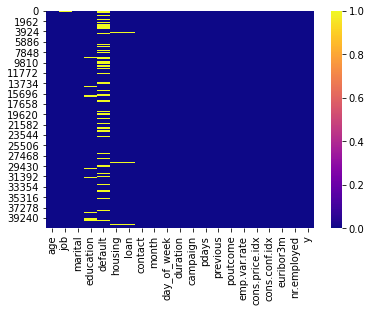

In [6]:
sns.heatmap(df.isnull(),cmap='plasma')

In [7]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
default,8597,0.208726
education,1731,0.042027
housing,990,0.024036
loan,990,0.024036
job,330,0.008012
marital,80,0.001942
age,0,0.000000
poutcome,0,0.000000
nr.employed,0,0.000000
euribor3m,0,0.000000


In [8]:
df['default'] = df['default'].fillna(df['default'].dropna().mode().values[0] )
df['education'] = df['education'].fillna(df['education'].dropna().mode().values[0] )
df['job'] = df['job'].fillna(df['job'].dropna().mode().values[0] )
df['marital'] = df['marital'].fillna(df['marital'].dropna().mode().values[0] )
df['housing'] = df['housing'].fillna(df['housing'].dropna().mode().values[0] )
df['loan'] = df['loan'].fillna(df['loan'].dropna().mode().values[0] )


In [9]:
df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

# Data Visualization

In [10]:
df.nunique()

age                 78
job                 11
marital              3
education            7
default              2
housing              2
loan                 2
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

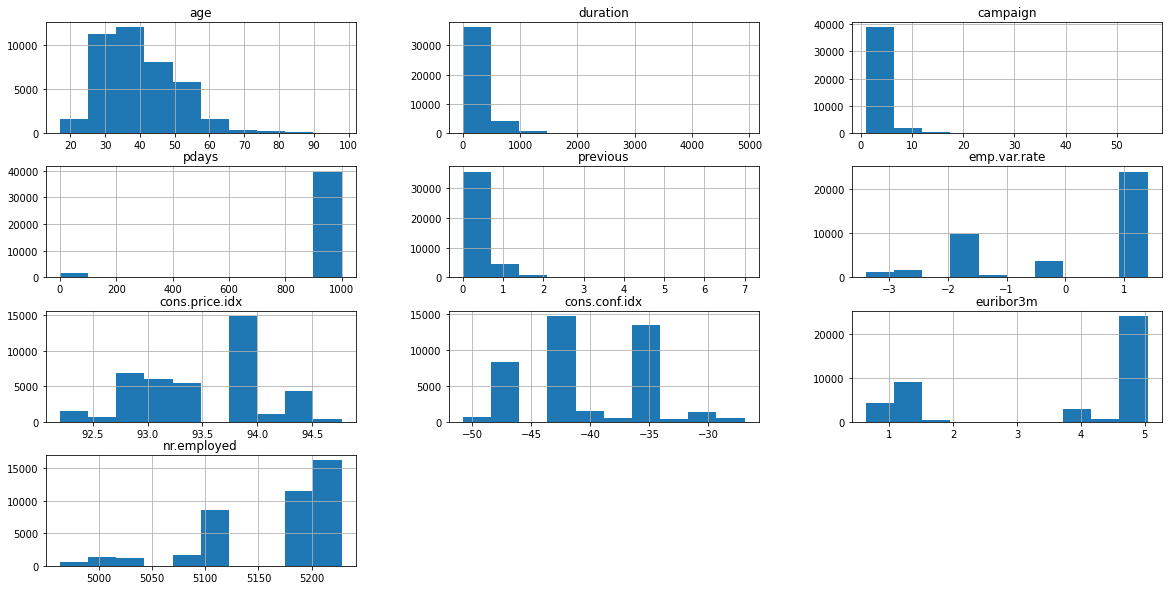

In [12]:
df.hist(figsize=(20,10)) #numerical feature distribution

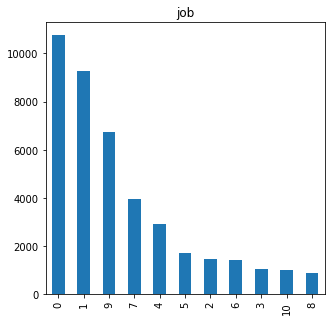

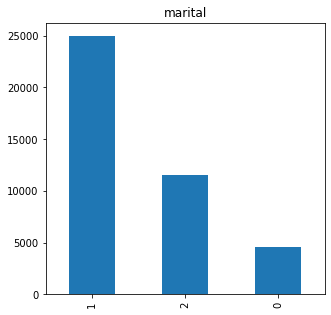

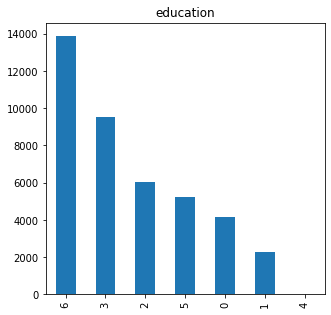

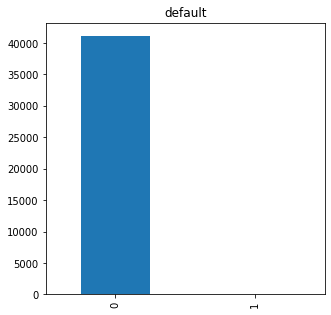

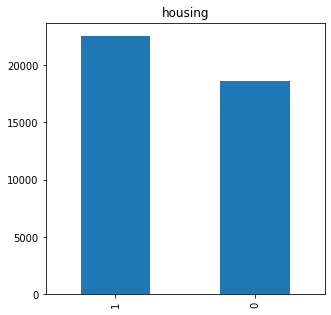

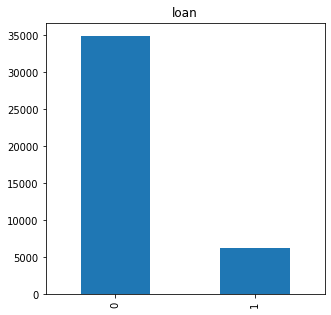

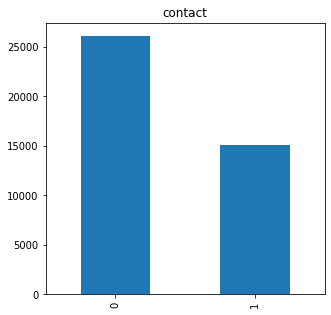

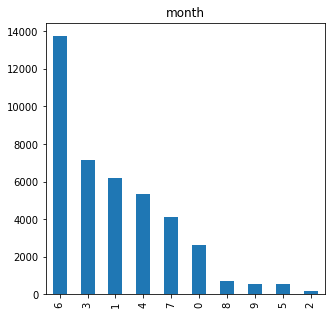

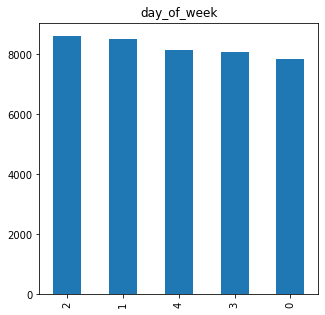

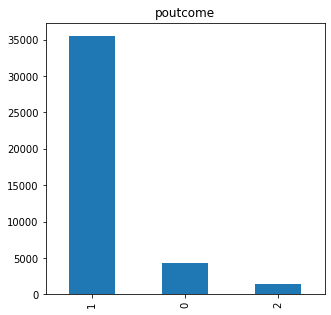

In [50]:
categorical = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for i in categorical:
    df[i].value_counts().plot(kind='bar',figsize = (5,5),title=i)
    plt.show()
    

<AxesSubplot:xlabel='marital', ylabel='count'>

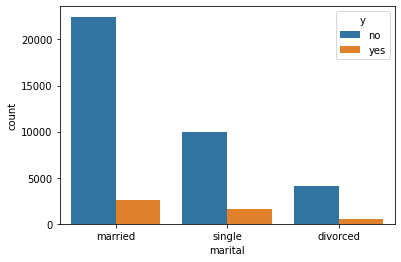

In [14]:
sns.countplot(x='marital',hue='y',data=df)

<AxesSubplot:xlabel='loan', ylabel='count'>

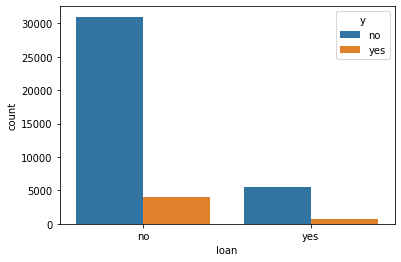

In [15]:
sns.countplot(x='loan',hue='y',data=df)

<AxesSubplot:xlabel='housing', ylabel='count'>

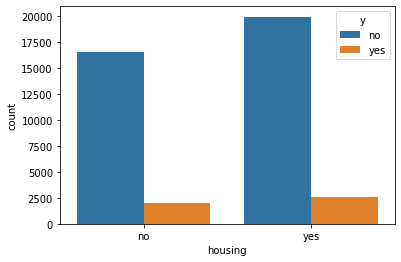

In [16]:
sns.countplot(x='housing',hue='y',data=df)

<AxesSubplot:xlabel='y', ylabel='count'>

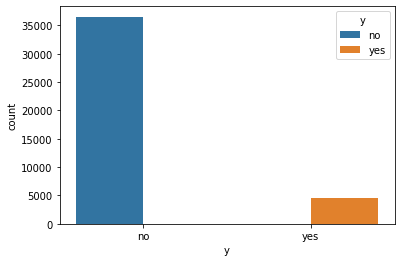

In [17]:
sns.countplot(x='y',hue='y',data=df)

<AxesSubplot:xlabel='default', ylabel='count'>

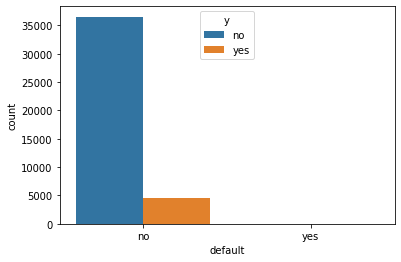

In [18]:
sns.countplot(x='default',hue='y',data=df)

<AxesSubplot:xlabel='poutcome', ylabel='count'>

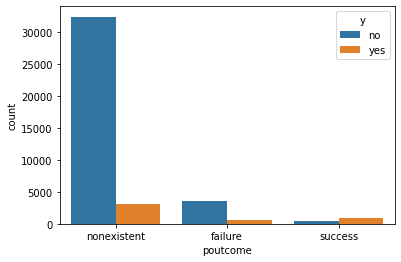

In [19]:
sns.countplot(x='poutcome',hue='y',data=df)

<AxesSubplot:>

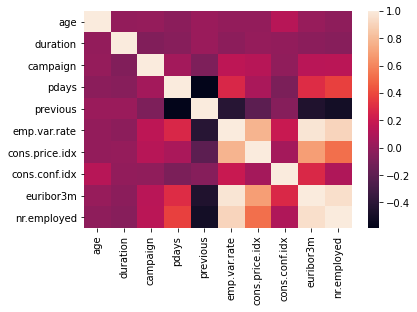

In [20]:
sns.heatmap(df.corr())

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Encoding Categorical data to Numerical data

In [22]:
from sklearn.preprocessing import LabelEncoder as LE

In [23]:
df['y']=LE().fit_transform(df['y'])
df['marital']=LE().fit_transform(df['marital'])
df['loan']=LE().fit_transform(df['loan'])
df['contact']=LE().fit_transform(df['contact'])
df['default']=LE().fit_transform(df['default'])
df['job']=LE().fit_transform(df['job'])
df['education']=LE().fit_transform(df['education'])
df['housing']=LE().fit_transform(df['housing'])
df['month']=LE().fit_transform(df['month'])
df['day_of_week']=LE().fit_transform(df['day_of_week'])
df['poutcome']=LE().fit_transform(df['poutcome'])

In [24]:
Counter(df['y'])

Counter({0: 36548, 1: 4640})

# Extracting Lables and Features

In [25]:
y = df['y']
X = df.drop('y', axis = 1)

In [26]:
X=np.array(X)
y=np.array(y)

In [27]:
X

array([[ 5.6000e+01,  3.0000e+00,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       [ 5.7000e+01,  7.0000e+00,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       [ 3.7000e+01,  7.0000e+00,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       ...,
       [ 5.6000e+01,  5.0000e+00,  1.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03],
       [ 4.4000e+01,  9.0000e+00,  1.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03],
       [ 7.4000e+01,  5.0000e+00,  1.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03]])

In [28]:
y

array([0, 0, 0, ..., 0, 1, 0])

# Balancing the imbalanced data using SMOTE

In [29]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'No.of rows Before Oversampling:{len(y)}')
print(f'No.of rows After OverSampling:{len(y_sm)}')
      

No.of rows Before Oversampling:41188
No.of rows After OverSampling:73096


In [30]:
Counter(y_sm)

Counter({0: 36548, 1: 36548})

<AxesSubplot:ylabel='count'>

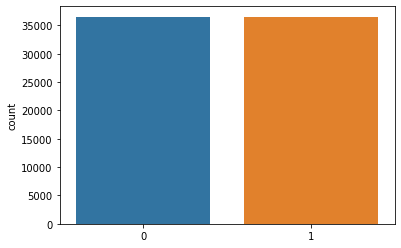

In [31]:
sns.countplot(y_sm, order=pd.value_counts(y_sm).iloc[:2].index)

# Splitting data into Training and Testing data

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.30, random_state=26)

# Scaling Data

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [35]:
Log = LogisticRegression()
Log.fit(X_train, y_train)
ypred_l= Log.predict(X_test)

In [36]:
accuracy_Log=accuracy_score(y_test, ypred_l)*100

In [37]:
cm = confusion_matrix(y_test, ypred_l)
cm

array([[9370, 1617],
       [1404, 9538]], dtype=int64)

In [38]:
print(f"Accuracy of Logistic Regression Classifer is {accuracy_Log}")

Accuracy of Logistic Regression Classifer is 86.22372201194764


# Random Forest Classifer

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc= RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred_r = rfc.predict(X_test)

In [41]:
cm = confusion_matrix(y_test, ypred_r)
cm

array([[10433,   554],
       [  450, 10492]], dtype=int64)

In [42]:
accuracy_rfc=accuracy_score(y_test,ypred_r)*100

In [43]:
print(f"Accuracy of Random Forest Classifer is {accuracy_rfc}")

Accuracy of Random Forest Classifer is 95.42158785170322


# Decision Tree classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

In [45]:
dtc=DecisionTreeClassifier(criterion="entropy",random_state=0)
dtc.fit(X_train,y_train)
ypred_d = dtc.predict(X_test)

In [46]:
accuracy_dtc=accuracy_score(y_test,ypred_d)*100

In [47]:
print(f"Accuracy of Decision Tree Classifer is {accuracy_dtc}")

Accuracy of Decision Tree Classifer is 93.54735738063751


# Comparing accuracies

In [48]:
from prettytable import PrettyTable
x = PrettyTable(["Model", "Score"])

x.add_row(["Logistic Regression",accuracy_Log ])
x.add_row(["Decision Tree",accuracy_dtc])
x.add_row(["Random Forest", accuracy_rfc])
x.sortby = "Score"
x.reversesort = True
print(x)

+---------------------+-------------------+
|        Model        |       Score       |
+---------------------+-------------------+
|    Random Forest    | 95.42158785170322 |
|    Decision Tree    | 93.54735738063751 |
| Logistic Regression | 86.22372201194764 |
+---------------------+-------------------+
